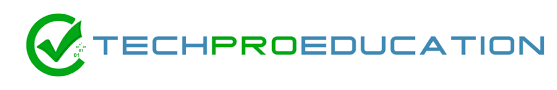

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [3]:
df.shape

(17414, 10)

In [4]:
df.isnull().sum()   #missing value yok

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


C:\Users\elifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


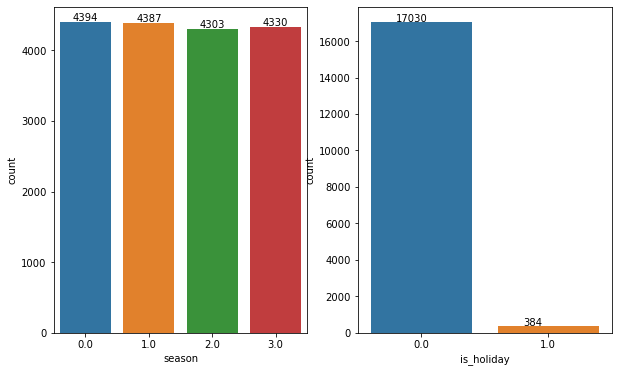

In [11]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)

ax = sns.countplot("season", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

plt.subplot(1,2,2)
ax = sns.countplot("is_holiday", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));


C:\Users\elifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elifo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


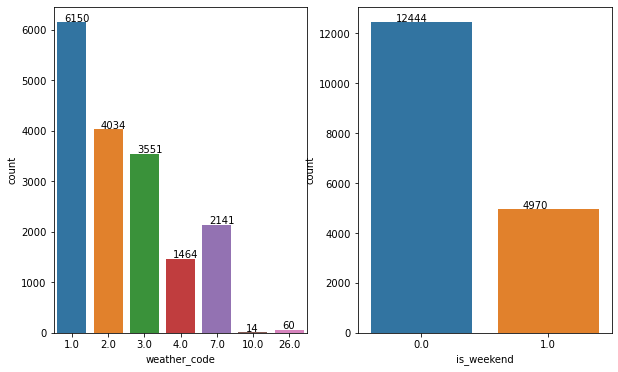

In [12]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)

ax = sns.countplot("weather_code", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

plt.subplot(1,2,2)
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [13]:
df.timestamp = pd.to_datetime(df.timestamp)

In [14]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

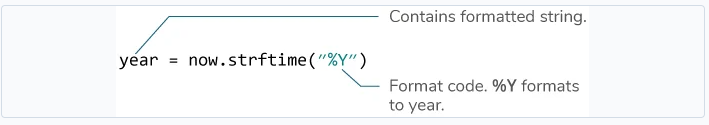

In [16]:
df["year-month"] = df.index.strftime("%Y-%m")
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

<AxesSubplot:>

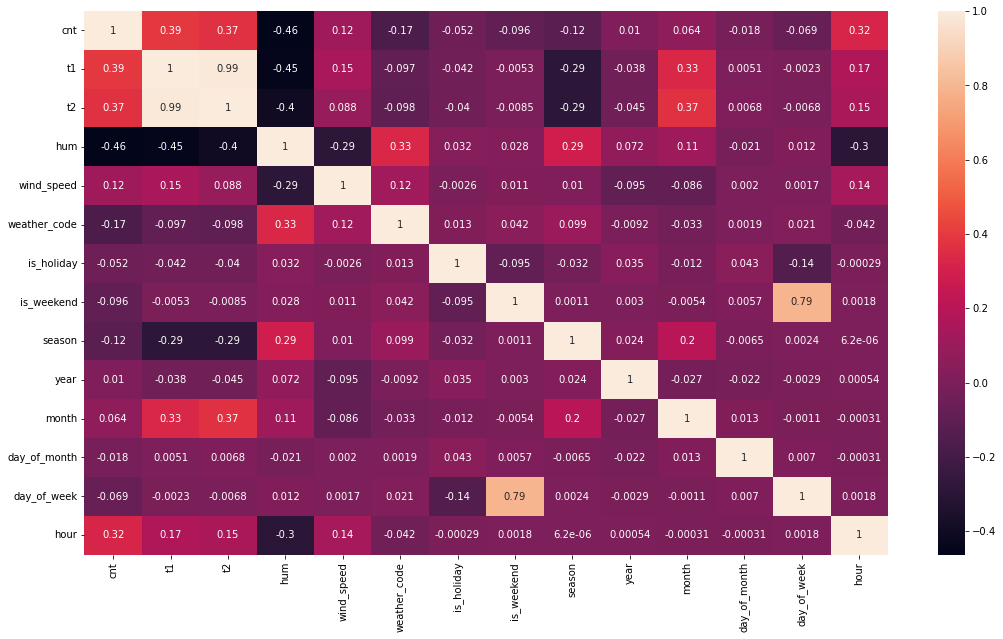

In [19]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),  annot=True)

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

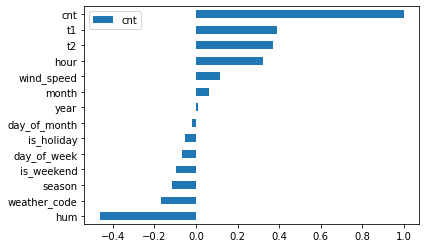

In [20]:
plt.figure(figsize=(10,6))

df.corr()[["cnt"]].sort_values(by="cnt").plot.barh()

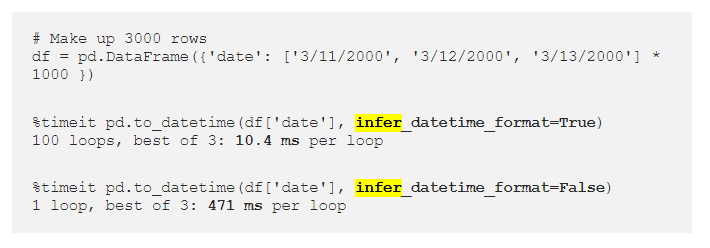

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

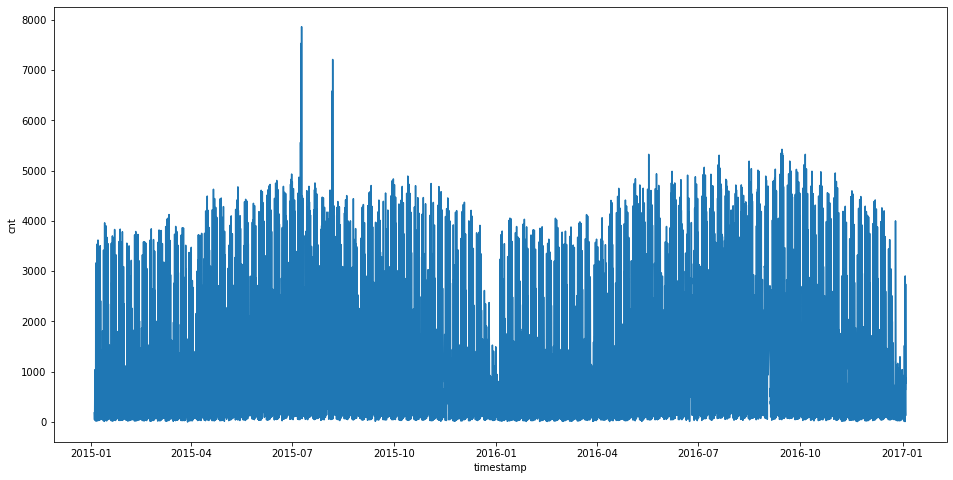

In [23]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.index, y="cnt", data=df)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [24]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


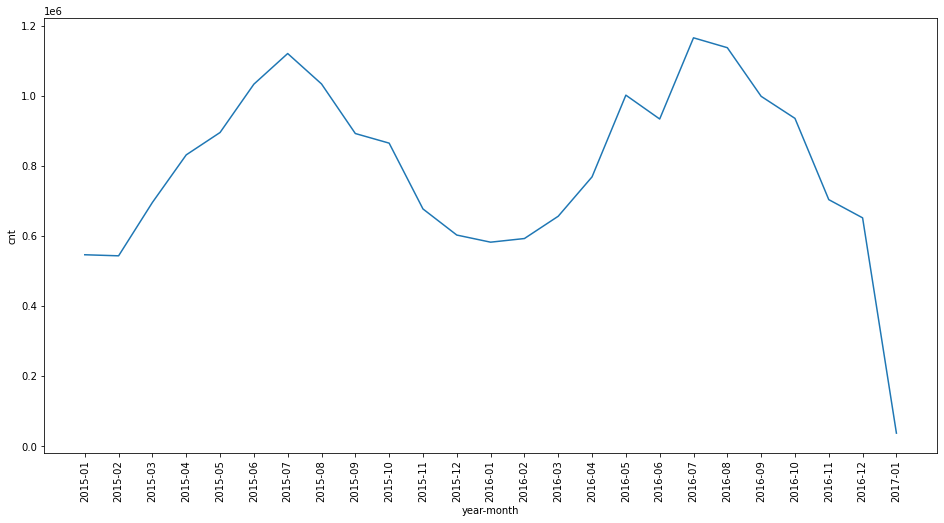

In [28]:
plt.figure(figsize=(16,8))
sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='month', ylabel='cnt'>

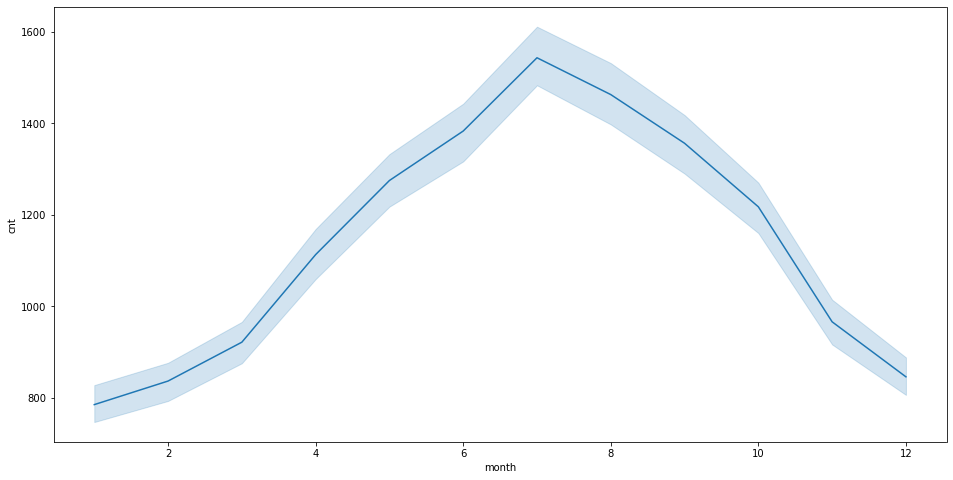

In [30]:
plt.figure(figsize=(16,8))
sns.lineplot(x= "month", y="cnt", data=df)

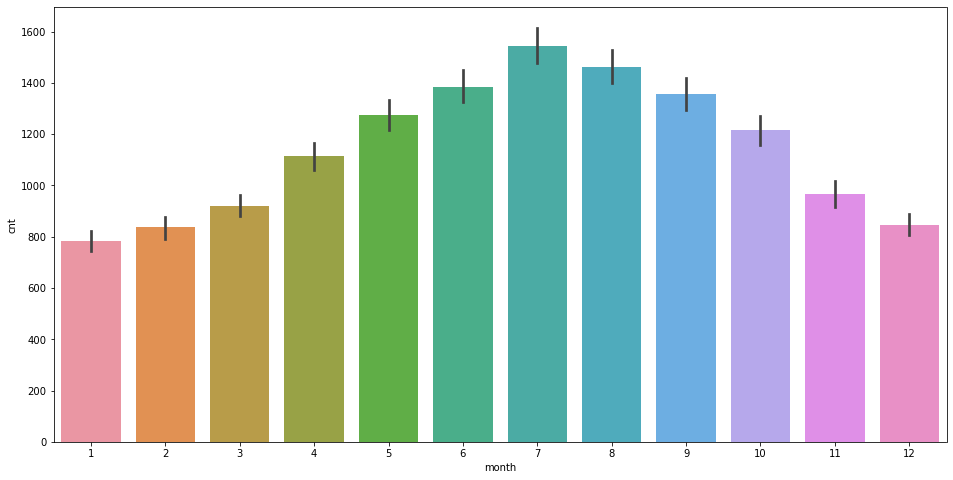

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(x= "month", y="cnt", data=df);

<AxesSubplot:xlabel='month', ylabel='cnt'>

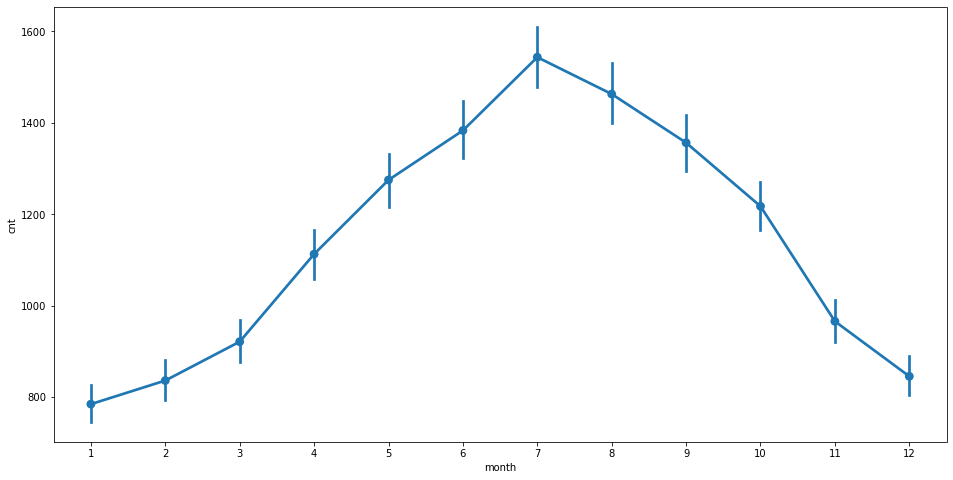

In [34]:
plt.figure(figsize=(16,8))
sns.pointplot(x= "month", y="cnt", data=df)

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

<AxesSubplot:xlabel='hour', ylabel='cnt'>

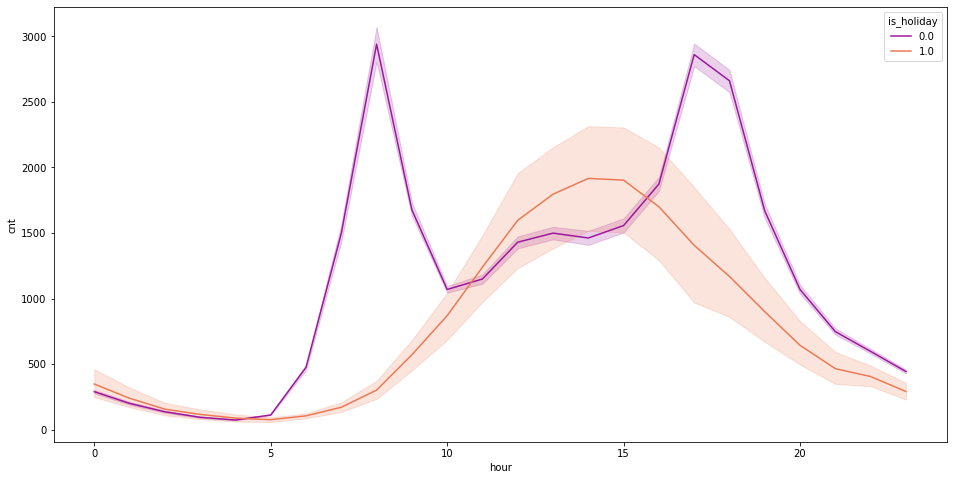

In [41]:
plt.figure(figsize=(16,8))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday", palette="plasma")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

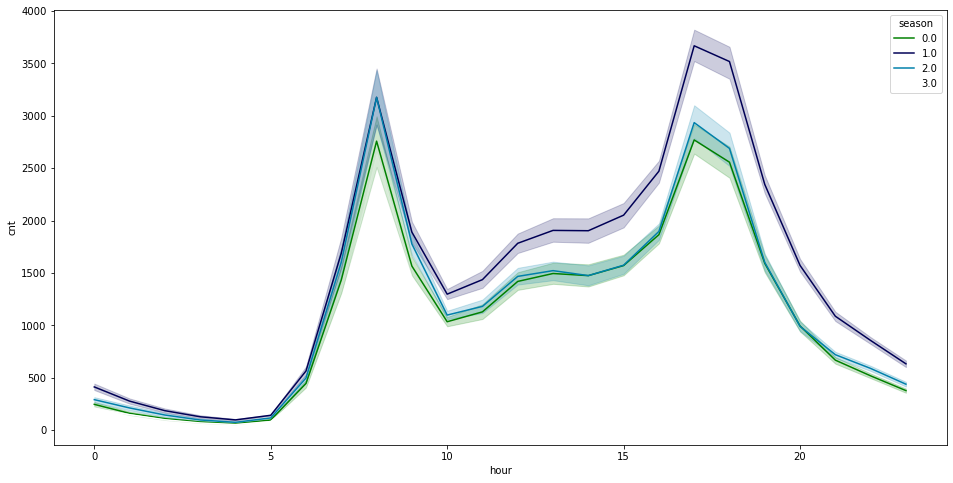

In [37]:
plt.figure(figsize=(16,8))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season",palette="ocean")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

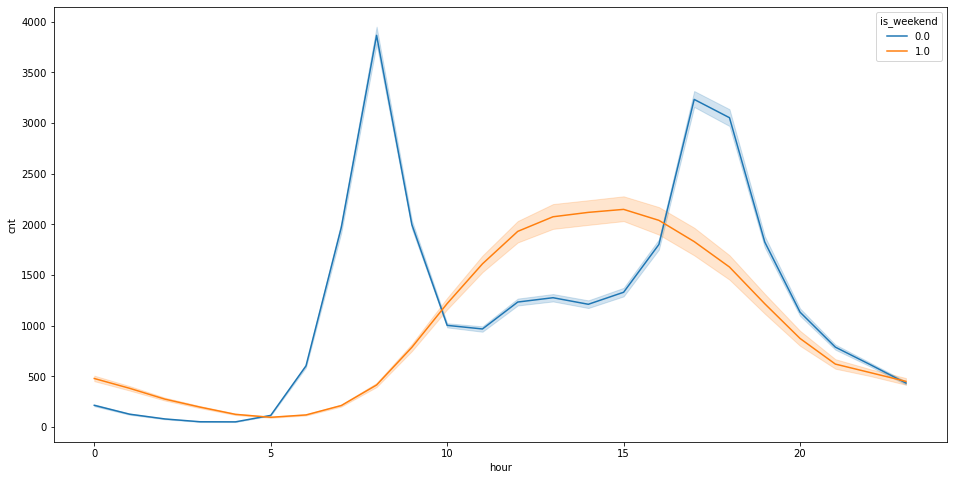

In [44]:
plt.figure(figsize=(16,8))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_weekend")

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

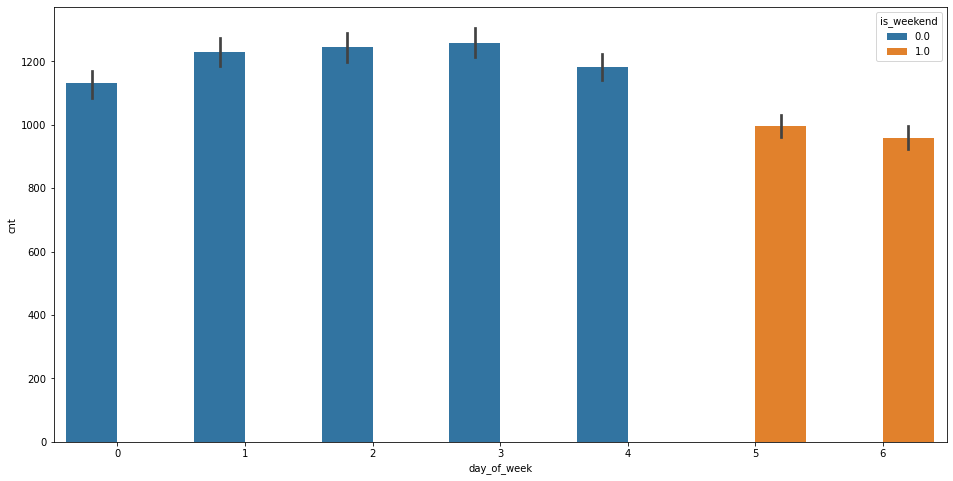

In [45]:
plt.figure(figsize=(16,8))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend");

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

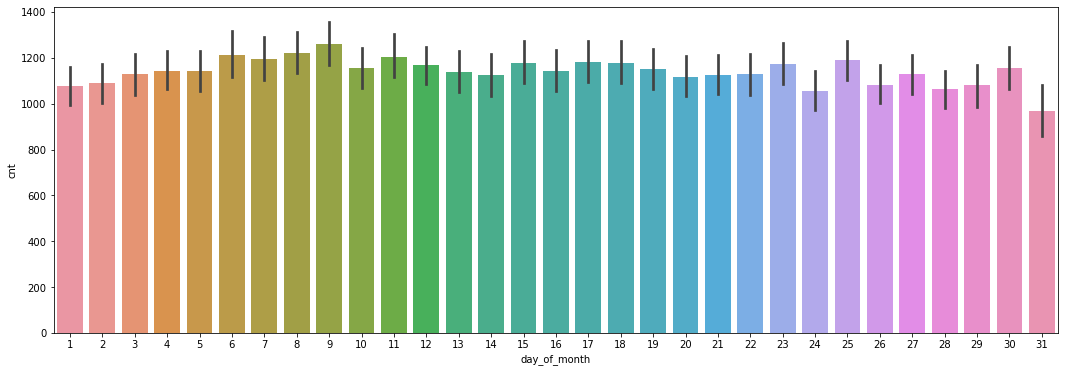

In [50]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="day_of_month", y="cnt")


<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

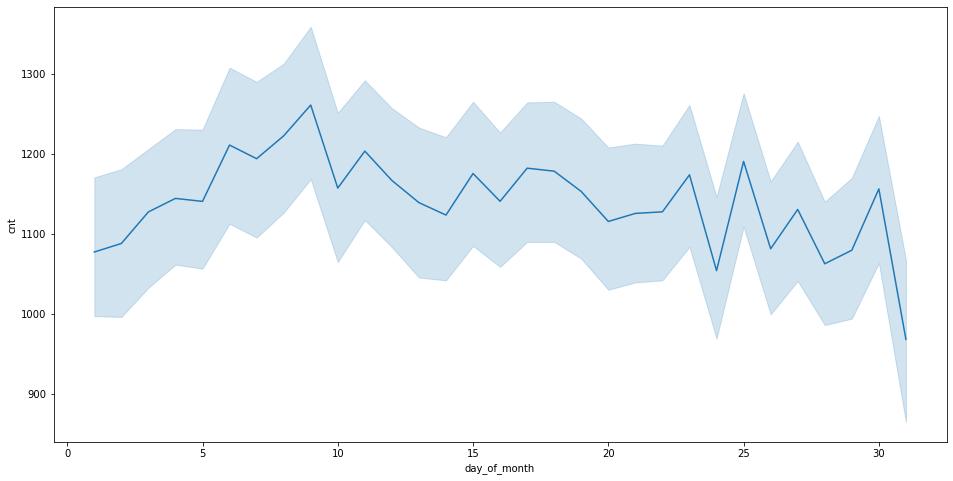

In [52]:


plt.figure(figsize=(16,8))

sns.lineplot(data=df, x="day_of_month", y="cnt")

In [46]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

<AxesSubplot:xlabel='year', ylabel='cnt'>

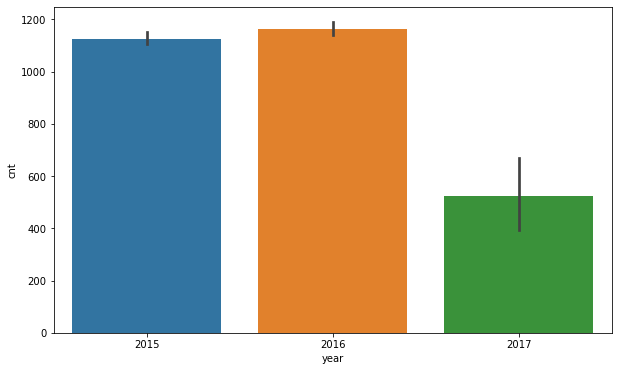

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt")

<AxesSubplot:xlabel='season', ylabel='cnt'>

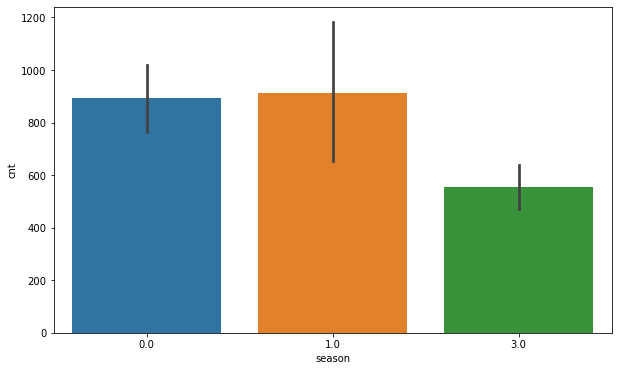

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt") 

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [57]:
c=df.is_weekend.value_counts().values
c

array([12444,  4970], dtype=int64)

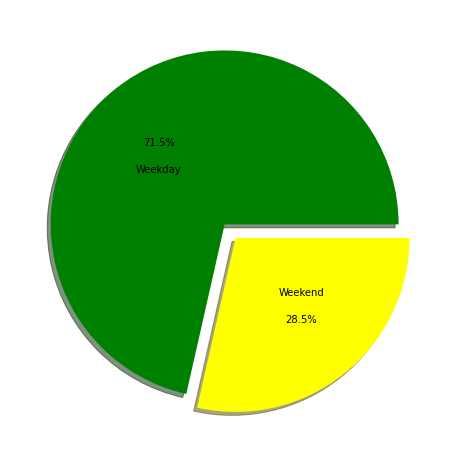

In [56]:
fig, ax = plt.subplots(figsize=(16,8))

colors_list = ["green","yellow"]
explode_list = [0, 0.1]

ax.pie(df.is_weekend.value_counts().values,
      labels=["Weekday","Weekend"],
      labeldistance=0.4,
      autopct="%.1f%%", shadow=True, 
      colors = colors_list, explode=explode_list);

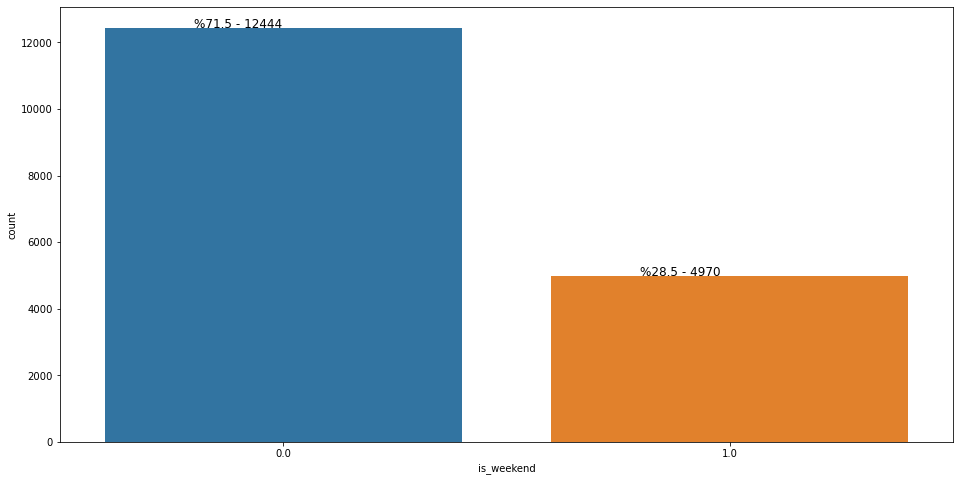

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

<AxesSubplot:xlabel='weather_code', ylabel='count'>

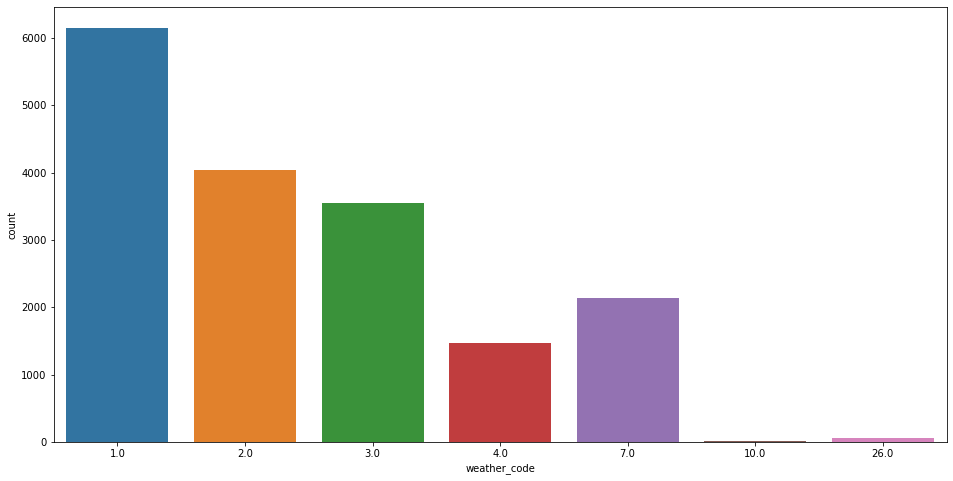

In [62]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x="weather_code", data=df)

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

There was no empty data in the data at all. So I don't need to drop these with dropna.Holiday not count is higher than holiday count. Weekdays count is more than weekend count.Clear weather count is the highest.t2 and t1 have strong correlation. All most the same thing. We can drop one. Weekend and day of week have high correlation.
The trend is throughout the months; it increases in 6 and 7 months and then decreases again. Bike shares are at work time also weekday. (At most 7:00 am and 17:00 pm)
Bike shares are the most in the week on Wednesday.Bike shares is the most on 8th and 9th days in a month. Bike shares are the most in 2016. Bike shares are more in spring than the other season.
## people tend to share bicycles as the weather is not foggy, snowy and rainy.
## good weather increases the amount of shared bicycles.
## the weekdays has almost no effect on the amount of the bicycles shared.
## the amount of the bicycles shared is mainly affected by the hours of the days which are early in the morning and evening times.
## we may conclude that people tend to get bicycles before or after work.
## seasons has been changing the preference. cold seasons make people choosing less than warm seasons.

## all in all, """people mainly prefer the biycles to get to work""" accordingly with the weather and tempreature. 
## the matters that affect temperature and weather affect the likeliness people use bicycles to get to work.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

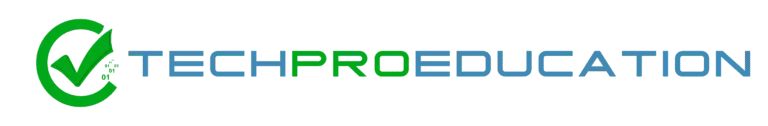